# Advanced Machine Learning Week 2

## PyTorch and TensorFlow

Both of these are neural network programs. TensorFlow is older and more established, but you have to interact with it through a high-level API, making debugging and interacting with the object more difficult. PyTorch is newer but is more concrete and is eaiser to deal with in the nitty gritty. PyTorch is less used than TensorFlow but is becoming more prevalent. These days, PyTorch is the more popular neural network application for academic publications. 

## Neural Networks Basics

A neural network is a computational model inspired by the structure and functioning of the human brain. Consist of interconnected nodes (neurons) organized in layers

### Architecture
- Input layer: receives input data feature
- Hidden layers: intermediate layers that perform computations
- Output layer: produces final output or prediction

### Forward Pass and Activation Functions:
- Forward Pass: input data flows through network, and computations are performed layer by layer
- Activation Functions: Non-linear functions applied to weighted sum of inputs to introduce non-linearity and enable network to learn complex patterns
- Automatic feature engineering: this all happens in the hidden layers, we do not have to do it by hand

### Functional Form of a Neuron
Functional form:
- Input: $x=(x_1,x_2,...,x_n)$ input features or values
- Weighted sum: $z=\sum^{n}_{i=1}w_i*x_i+b$ - linear combo of inputs with weights $w$ and bias $b$
- Activation function: $a = f(z)$ - nonlinear function applied to the weigthed sum

These are then fed as the inputs to the next layer of the NN.

### Activation Functions
- **Sigmoid Functions**:
    - $\sigma(z)=\frac{1}{1+e^{-z}}$ - S-shaped curve mapping input to a range between 0 and 1. Used in binary classification tasks
- **Softmax Function**:
    - $Softmax(z_i) = \frac{e^{z_i}}{\sum^{N}_{j=1}e^{z_j}}$ - outputs prob distribution over multiple classes (for multi-classification tasks)
- **ReLU (rectified linear unit)**
    - outputs input if it is positive, otherwise outputs zero (helps with vanishing gradient problem)
- **Tanh (hyperbolic tangent, -1 to 1)**

## Motivation for Using Neural Networks
**Universal Approximation Theorem (UAT)**:
- A feed-forward neural network with single hidden layer and non-linear activation function can approximate any continuous function to arbitrary accuracy given enough neurons
- Theorem highlights the expressive power of neural networks in capturing complex relationships and functions

**Key Points**:
- Neural networks with non-linear activation functions can learn and represent highly nonlinear and intricate mappings between inputs and outputs
- The flexibility and adaptability of neural networks make them suitable for a wide range of tasks, including regression and classification
- Number of neurons in the hidden layer in the choice of activation function play crucial roles in the network's capacity to approximate complex functions

## Training Neural Networks
- **Pass**:
    - input data is pass through networks, computations done layer by layer
    - activation functions introduce non-linearity
- **Loss calculation**:
    - The output of the network is compared to the target values using the loss function (more or less error)
    - Common loss functions include Mean Squared Error or Cross Entropy Loss
- **Backward Pass**:
    - gradients of the loss function with respect to the model parameters are computed using backpropagation
    - optimizers update the model parameters (weights and biases) to minimize the loss
- **Update weights and biases**:
    - Optimizers like SGD (stochastic gradient descent), Adam, RMSProp, etc. adjust the model parameters based on computer gradients and learning rate
    
## Practical Applications of Neural Networks
- **Image Classification**
    - Identifying objects, scenes, or patterns within images
    - Applications in healthcare, autonomous vehicles, security, etc
- **Natural Language Processing (NLP)**
    - text analysis, sentiment analysis, language translation, chatbots, etc
    - used in social media, customer support, content generation, etc
- **Medical Diagnoses**
    - disease diagnosis, medical imaging analysis, patient monitoring, drug discovery, etc
    - improving healthcare outcomes and decision-making

In [1]:
import torch

import numpy as np
import pandas as pd

# Tensors!

"Tensor" means various things in various fields, but here we just mean an array of numbers, possibly with many indices:

scalar --> vector --> matrix --> tensor

On a surface level not too different from numpy arrays but there are some important differences

In [2]:
a = [1.0,2.0,3.0]
a[0]

1.0

In [3]:
a = torch.ones(3)
a

tensor([1., 1., 1.])

Usually the point of tensors is to remember more structure in the data, like a set of points in 2-space

In [4]:
points = torch.tensor([[4.0,1.0],[5.0,3.0],[2.0,1.0]])
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [5]:
points.shape

torch.Size([3, 2])

In [6]:
points.size()

torch.Size([3, 2])

In [7]:
points[0,1] # first row (0th index), second column (1st index)

tensor(1.)

In [8]:
print(points[0,:]) # first row, all columns

tensor([4., 1.])


Quick preview of interesting shape things

In [9]:
example_img_random = torch.randn(3,5,5) # shape [channels, rows, columns]
example_img_random # 3 channels, 5 rows and 5 columns in each channel

tensor([[[-1.0896, -0.2983, -1.3152, -1.4496, -0.7849],
         [-2.0778,  0.5728, -1.0289,  0.6196, -1.4968],
         [ 0.4799, -0.9976,  0.4685, -0.6483, -0.5628],
         [-0.9388,  0.4559,  0.3779,  0.0292, -0.7825],
         [-1.6375, -0.3343,  0.5717,  1.6170,  1.8251]],

        [[-2.5850,  1.9202, -0.0570, -0.1299,  1.9081],
         [ 0.9567,  0.4339, -0.6544, -1.0121, -0.7406],
         [ 0.4469, -0.5524, -0.6271,  1.8377, -1.0673],
         [ 1.1303,  0.4451, -0.4285,  0.1561,  0.5326],
         [ 0.3593,  2.2509,  0.4461, -0.4855, -0.4646]],

        [[-0.7214,  0.0762,  1.2900,  1.7521, -0.9882],
         [-1.9296, -0.2482,  0.0813,  1.8861,  1.5183],
         [ 0.1004,  0.7483, -0.3566,  0.4525,  1.2837],
         [-0.0165,  0.6985, -0.1197,  1.1372, -0.8226],
         [ 1.6041, -0.3289,  0.0251, -0.2988,  1.2222]]])

Often we process tensors multiple observations at a time

In [10]:
ex_img_random_2 = torch.randn(2,3,5,5) # shape [batches, channels, rows, columns]
ex_img_random_2 # 2 batches of 3 channels, each matrix 5x5 in dimension

tensor([[[[ 1.2492,  0.5201,  0.0685,  1.8423, -0.8541],
          [ 1.1466, -2.1151,  1.5093,  0.8206,  0.1648],
          [ 0.5448,  0.0154, -1.0897,  1.3993,  1.1754],
          [ 0.0757,  1.2102,  0.1873,  1.2704,  1.9579],
          [ 1.7004,  1.6284, -0.2237, -1.1984, -0.2619]],

         [[-1.9459, -0.7544,  0.3793, -1.7140,  0.0048],
          [ 0.1399,  1.1124,  1.4198, -0.4126, -0.6825],
          [ 0.7184,  1.4801, -0.4115, -0.3012, -0.2457],
          [ 0.5911,  0.5579,  0.0746,  0.7584,  1.6836],
          [-0.3981, -0.6672,  0.4518, -0.1634, -0.8388]],

         [[ 0.5421, -1.1559, -1.1747, -1.6420, -0.4168],
          [-1.9984, -0.7979, -0.2650,  0.3605,  0.9102],
          [ 0.3561,  0.5339,  1.0792,  0.7458, -0.3398],
          [-0.4203,  1.2348, -0.0957, -0.2029, -0.4850],
          [ 1.1187,  0.8410,  0.2313, -0.3495, -0.7155]]],


        [[[ 0.6186,  0.1123, -0.4823,  1.3849,  1.2838],
          [-0.3440,  0.4204,  0.4784, -0.1591, -1.2155],
          [ 0.6104, -0.

In [11]:
points_gpu = torch.tensor([[4.0,1.0],[5.0,3.0],[2.0,1.0]])
points_gpu

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [12]:
nparray = np.array([1,2,3])
torchtensor = torch.from_numpy(nparray)
torchtensor

tensor([1, 2, 3], dtype=torch.int32)

Datasets and Data Loaders

In [13]:
from sklearn.datasets import load_iris
from torch.utils.data import Dataset, DataLoader

In [14]:
# Load Iris dataset from sklearn
iris = load_iris()
data = iris.data
targets = iris.target

In [15]:
# Convert data and targets to PyTorch tensors
data_tensor = torch.tensor(data, dtype = torch.float32)
target_tensor = torch.tensor(targets, dtype = torch.int64)

In [16]:
# When creating our dataset, we really do create a subclass of the PyTorch Dataset class,
# implementing three methods (functions):

class IrisDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.target = targets
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,idx):
        sample = {
            'features': self.data[idx],
            'target': self.target[idx]
        }
        return sample

In [17]:
iris_dataset = IrisDataset(data_tensor, target_tensor)

In [18]:
iris_dataset.__getitem__(5)

{'features': tensor([5.4000, 3.9000, 1.7000, 0.4000]), 'target': tensor(0)}

In [19]:
batch_size = 4 # pull out 4 flowers at a time
iris_dataloader = DataLoader(iris_dataset, batch_size = batch_size, shuffle=True)

In [20]:
num_batches_to_iterate = 3

for batch_idx, batch in enumerate(iris_dataloader):
    if batch_idx >= num_batches_to_iterate:
        break
    features_batch = batch['features']
    target_batch = batch['target']
    # Let's print

### Considerations Around Batch Size
- larger means faster training but potentially worse model performance
- batch size is constrained by amount of memory on your GPU you use for training
- smaller batches make noisier gradients, larger batches obscure details
- perhaps start with 32 or a "moderate" size

## Exercise

In [21]:
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [22]:
# Load penguin dataset from Seaborn
penguins = sns.load_dataset('penguins')
pdata = penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','species']].dropna().to_numpy()
ptargets = penguins[['species']].to_numpy()

In [28]:
# Convert data and targets to PyTorch tensors
species_encoder = LabelEncoder()
island_encoder = LabelEncoder()
pdata_tensor = torch.tensor(pdata, dtype = torch.float32)
ptarget_tensor = torch.tensor(LabelEncoder().fit_transform(penguins.dropna().species),dtype=torch.int64)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

In [24]:
class PenguinDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.target = targets
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,idx):
        sample = {
            'features': self.data[idx],
            'target': self.target[idx]
        }
        return sample

In [25]:
penguin_dataset = PenguinDataset(pdata_tensor, ptarget_tensor)

NameError: name 'pdata_tensor' is not defined

In [26]:
penguin_dataset.__getitem__(10)

NameError: name 'penguin_dataset' is not defined

In [27]:
batch_size = 10 # pull out 4 flowers at a time
penguin_dataloader = DataLoader(penguin_dataset, batch_size = batch_size, shuffle=True)

NameError: name 'penguin_dataset' is not defined

In [ ]:
num_batches_to_iterate = 3

for batch_idx, batch in enumerate(penguin_dataloader):
    if batch_idx >= num_batches_to_iterate:
        break
    features_batch = batch['features']
    target_batch = batch['target']
    # Let's print
    print(f"Batch {batch_idx+1}:")
    print("Features:", features_batch)
    print("Targets:", target_batch)
    print('\n')

## Neural Network

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [30]:
# Input features (temp in C)
t_c = [0.5,14.0,15.0,28.0,11.0,8.0,3.0,-4.0,6.0,13.0,21.0]
x = torch.tensor(t_c).view(-1,1)

# Target values (temp in F)
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
y = torch.tensor(t_u).view(-1, 1)  # Reshape to a 2D tensor with 11 rows and 1 column

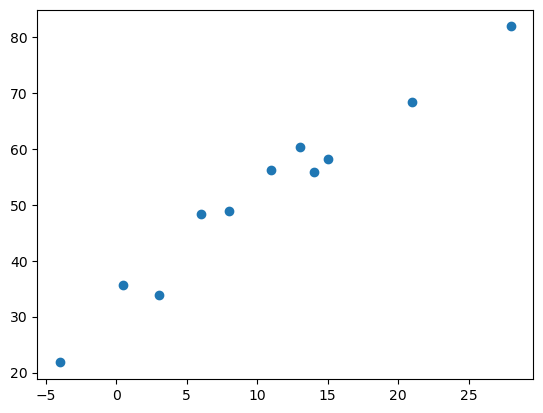

In [31]:
plt.scatter(t_c, t_u);

In [32]:
# Data normalization
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_normalized = scaler_x.fit_transform(x.float())
y_normalized = scaler_y.fit_transform(y.float())

In [33]:
class LinearNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearNet, self).__init__()
        self.lin_coeffs = nn.Linear(input_size, output_size)


    def forward(self, x):
        x = self.lin_coeffs(x)
        return x

    
# Define a simple linear regression model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output

    def forward(self, x):
        return self.linear(x)

In [34]:
# Instantiate the linear regression model, loss function, and optimizer
#model = LinearRegression()
model = LinearNet(1,1)
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.SGD(model.parameters(), lr=0.001) # Stochastic gradient descent, lr is learning rate

In [35]:
# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass: compute predicted y by passing x to the model
    y_pred = model(torch.tensor(x_normalized, dtype=torch.float32))

    # Compute and print loss
    loss = criterion(y_pred, torch.tensor(y_normalized, dtype=torch.float32))
    if epoch % 100 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item()}') # print loss every 100 epochs
        print(model.state_dict())

    # Zero gradients, perform a backward pass, and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# After training, print the final model parameters
print(f'Final Model Parameters: {model.state_dict()}')

Epoch 1, Loss: 3.3572068214416504
OrderedDict([('lin_coeffs.weight', tensor([[-0.6354]])), ('lin_coeffs.bias', tensor([-0.8408]))])
Epoch 101, Loss: 2.262023687362671
OrderedDict([('lin_coeffs.weight', tensor([[-0.3422]])), ('lin_coeffs.bias', tensor([-0.6883]))])
Epoch 201, Loss: 1.5281955003738403
OrderedDict([('lin_coeffs.weight', tensor([[-0.1021]])), ('lin_coeffs.bias', tensor([-0.5634]))])
Epoch 301, Loss: 1.0364925861358643
OrderedDict([('lin_coeffs.weight', tensor([[0.0944]])), ('lin_coeffs.bias', tensor([-0.4612]))])
Epoch 401, Loss: 0.7070263624191284
OrderedDict([('lin_coeffs.weight', tensor([[0.2552]])), ('lin_coeffs.bias', tensor([-0.3775]))])
Epoch 501, Loss: 0.4862668216228485
OrderedDict([('lin_coeffs.weight', tensor([[0.3869]])), ('lin_coeffs.bias', tensor([-0.3090]))])
Epoch 601, Loss: 0.33834683895111084
OrderedDict([('lin_coeffs.weight', tensor([[0.4946]])), ('lin_coeffs.bias', tensor([-0.2529]))])
Epoch 701, Loss: 0.2392331063747406
OrderedDict([('lin_coeffs.weight

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
penguins = sns.load_dataset("penguins")

penguins = penguins.dropna()

In [38]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [39]:
penguins.shape

(333, 7)

In [40]:
label_encoder = LabelEncoder()
penguins['species_encoded'] = label_encoder.fit_transform(penguins['species'])

In [41]:
class PenguinDataset(Dataset):
    def __init__(self, data):
        self.X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
        self.y = data['species_encoded'].values
        self.n_samples = len(data)

    def __getitem__(self, index):
        return torch.tensor(self.X[index], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.int64)

    def __len__(self):
        return self.n_samples

In [43]:
train_data, test_data = train_test_split(penguins, test_size=0.2, random_state=12345)

train_dataset = PenguinDataset(train_data)
test_dataset = PenguinDataset(test_data)

train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

In [44]:
train_dataset.__getitem__(5) # there's a problem! These need to be scaled

(tensor([  42.0000,   19.5000,  200.0000, 4050.0000]), tensor(0))

In [45]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [46]:
input_size = 4  # Number of features
hidden_size = 64  # Size of the hidden layer
num_classes = len(label_encoder.classes_) 
learning_rate = 0.001

In [47]:
model = SimpleNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [48]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

Epoch 1/10, Loss: 103.3366
Epoch 2/10, Loss: 31.1857
Epoch 3/10, Loss: 7.2482
Epoch 4/10, Loss: 4.6541
Epoch 5/10, Loss: 5.1869
Epoch 6/10, Loss: 3.5271
Epoch 7/10, Loss: 7.9234
Epoch 8/10, Loss: 6.5449
Epoch 9/10, Loss: 2.8625
Epoch 10/10, Loss: 1.5987


In [49]:
# Evaluation on the test set
model.eval()
correct = 0
total = 0

# might be worth picking this apart line by line...
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.2%}")

Accuracy on test set: 71.64%


The accuracy is so bad because our features are not scaled.

In [50]:
num_batches_to_iterate = 3  # Specify the number of batches you want to iterate through


with torch.no_grad():
    for batch_idx, batch in enumerate(test_loader):
        if batch_idx >= num_batches_to_iterate:
            break
        outputs = model(inputs)
        print(inputs)
        print(outputs)
        _, predicted = torch.max(outputs.data, 1)
        print(predicted)
        print('\n\n\n')

tensor([[  37.7000,   18.7000,  180.0000, 3600.0000],
        [  42.7000,   13.7000,  208.0000, 3950.0000],
        [  39.2000,   21.1000,  196.0000, 4150.0000]])
tensor([[102.7904, 103.4115, 103.4901],
        [112.0808, 111.8400, 112.3456],
        [118.6411, 119.3896, 120.0489]])
tensor([2, 2, 2])




tensor([[  37.7000,   18.7000,  180.0000, 3600.0000],
        [  42.7000,   13.7000,  208.0000, 3950.0000],
        [  39.2000,   21.1000,  196.0000, 4150.0000]])
tensor([[102.7904, 103.4115, 103.4901],
        [112.0808, 111.8400, 112.3456],
        [118.6411, 119.3896, 120.0489]])
tensor([2, 2, 2])




tensor([[  37.7000,   18.7000,  180.0000, 3600.0000],
        [  42.7000,   13.7000,  208.0000, 3950.0000],
        [  39.2000,   21.1000,  196.0000, 4150.0000]])
tensor([[102.7904, 103.4115, 103.4901],
        [112.0808, 111.8400, 112.3456],
        [118.6411, 119.3896, 120.0489]])
tensor([2, 2, 2])






In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = scaled_features

In [52]:
train_data, test_data = train_test_split(penguins, test_size=0.2, random_state=12345)

train_dataset = PenguinDataset(train_data)
test_dataset = PenguinDataset(test_data)

train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)


model = SimpleNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [53]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

Epoch 1/10, Loss: 0.9166
Epoch 2/10, Loss: 0.7466
Epoch 3/10, Loss: 0.5972
Epoch 4/10, Loss: 0.4750
Epoch 5/10, Loss: 0.3811
Epoch 6/10, Loss: 0.3074
Epoch 7/10, Loss: 0.2530
Epoch 8/10, Loss: 0.2136
Epoch 9/10, Loss: 0.1842
Epoch 10/10, Loss: 0.1562


In [54]:
# Evaluation on the test set
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.2%}")

Accuracy on test set: 98.51%


Much better! Scaling our features this time around let to a much higher accuracy. 

In [55]:
# Load the Titanic dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_df = pd.read_csv(url)

# Drop rows with missing values for simplicity
titanic_df = titanic_df.dropna()

In [56]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [57]:
label_encoder = LabelEncoder()
titanic_df['sex_encoded'] = label_encoder.fit_transform(titanic_df['Sex'])
scaled_features = scaler.fit_transform(titanic_df[['Pclass','sex_encoded','Age']])
titanic_df[['Pclass','sex_encoded','Age']] = scaled_features

In [58]:
class TitanicDataset(Dataset):
    def __init__(self, data):
        self.X = data[['Pclass','sex_encoded','Age']].values
        self.y = data['Survived'].values
        self.n_samples = len(data)
        
    def __getitem__(self,index):
        return torch.tensor(self.X[index],dtype = torch.float32), torch.tensor(self.y[index],dtype=torch.int64)
    
    def __len__(self):
        return self.n_samples

In [59]:
train_data, test_data = train_test_split(titanic_df, test_size=0.2, random_state=12345)

train_dataset = TitanicDataset(train_data)
test_dataset = TitanicDataset(test_data)

train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

In [60]:
train_dataset.__getitem__(5)

(tensor([ 0.8305,  0.7403, -0.4585]), tensor(0))

In [67]:
class TitanicNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TitanicNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        print(f"Input shape: {x.shape}")
        out = self.fc1(x)
        print(f"After fc1: {out.shape}")
        out = self.sigmoid(out)
        print(f"After sig1: {out.shape}")
        out = self.fc2(out)
        print(f"After fc2: {out.shape}")
        out = self.sigmoid(out)
        print(f"After sig2: {out.shape}")
        return out

In [68]:
input_size = 3  # Number of features
hidden_size = 64  # Size of the hidden layer
num_classes = len(label_encoder.classes_) 
learning_rate = 0.001

In [69]:
model = TitanicNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [70]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
A

Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
A

Input shape: torch.Size([5, 3])
After fc1: torch.Size([5, 64])
After sig1: torch.Size([5, 64])
After fc2: torch.Size([5, 2])
After sig2: torch.Size([5, 2])
Epoch 6/10, Loss: 0.6011
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: t

Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
A

In [71]:
# Evaluation on the test set
model.eval()
correct = 0
total = 0

# might be worth picking this apart line by line...
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.2%}")

Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
After fc1: torch.Size([16, 64])
After sig1: torch.Size([16, 64])
After fc2: torch.Size([16, 2])
After sig2: torch.Size([16, 2])
Input shape: torch.Size([16, 3])
A